## Iris 종 분류하기
<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png"><br/>


In [1]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터셋 불러오기
df = pd.read_csv("dataset/Iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
len(df)

150

### 변수 설명
### 데이터 출처 : https://www.kaggle.com/uciml/iris

- Id : 아이디
- SepalLengthCm : 꽃받침 길이 in cm
- SepalWidtdCm : 꽃받침 너비 in cm
- PetalLengthCm : 꽃잎 길이 in cm
- PetalWidthCm : 꽃잎 너비 in cm
- Species : Iris의 종 

In [4]:
# 기초 통계량 확인
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### 확인할것:

- 최대/최소값이 너무 크거나 작아 이상치라고 판단 될 수 있는 경우.


In [5]:
# check Datetype and whether there is null 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### 확인할것:
- Null 값의 존재유무
- 데이터 타입 

In [6]:
df['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [7]:
# Iris의 종별로 몇개씩 있는지 확인
from collections import Counter
Counter(df["Species"])

Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})

In [8]:
df.drop('Id',axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
# 아이디 제거 
df = df.iloc[:len(df), 1:] 
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 시각화를 통해 데이터 확인하기

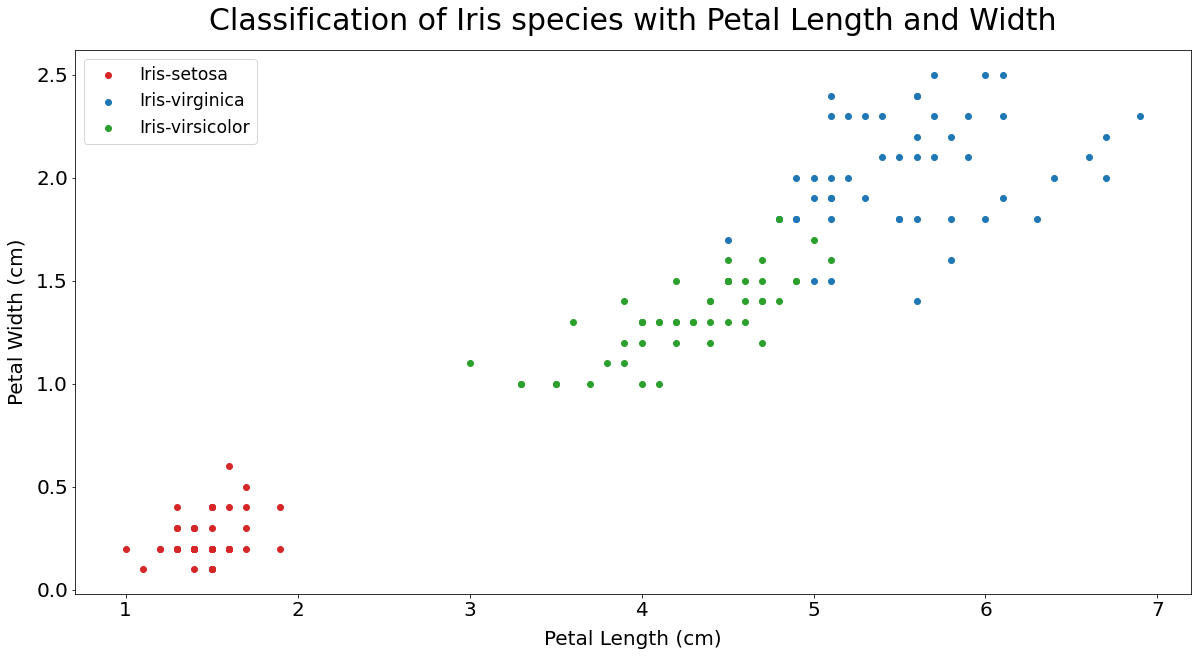

In [10]:
# Set Plot Size 
plt.figure(figsize=(20, 10)) 

## Set Variables 
plt.scatter(df["PetalLengthCm"].loc[df["Species"]=="Iris-setosa"], df["PetalWidthCm"].loc[df["Species"]=="Iris-setosa"], 
            c="tab:red", label="Iris-setosa")
plt.scatter(df["PetalLengthCm"].loc[df["Species"]=="Iris-virginica"], df["PetalWidthCm"].loc[df["Species"]=="Iris-virginica"], 
            c="tab:blue", label="Iris-virginica")
plt.scatter(df["PetalLengthCm"].loc[df["Species"]=="Iris-versicolor"], df["PetalWidthCm"].loc[df["Species"]=="Iris-versicolor"], 
            c="tab:green", label="Iris-virsicolor")

## Plot Labelling
plt.title('Classification of Iris species with Petal Length and Width',fontsize=30, pad=20) ## Title Labelling
plt.xlabel("Petal Length (cm)", fontsize = 20, labelpad=10) ## X-axis Labelling
plt.ylabel("Petal Width (cm)", fontsize = 20, labelpad=10) ## Y-axis Labelling

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

## Plot legnd 
plt.legend(fontsize="xx-large")

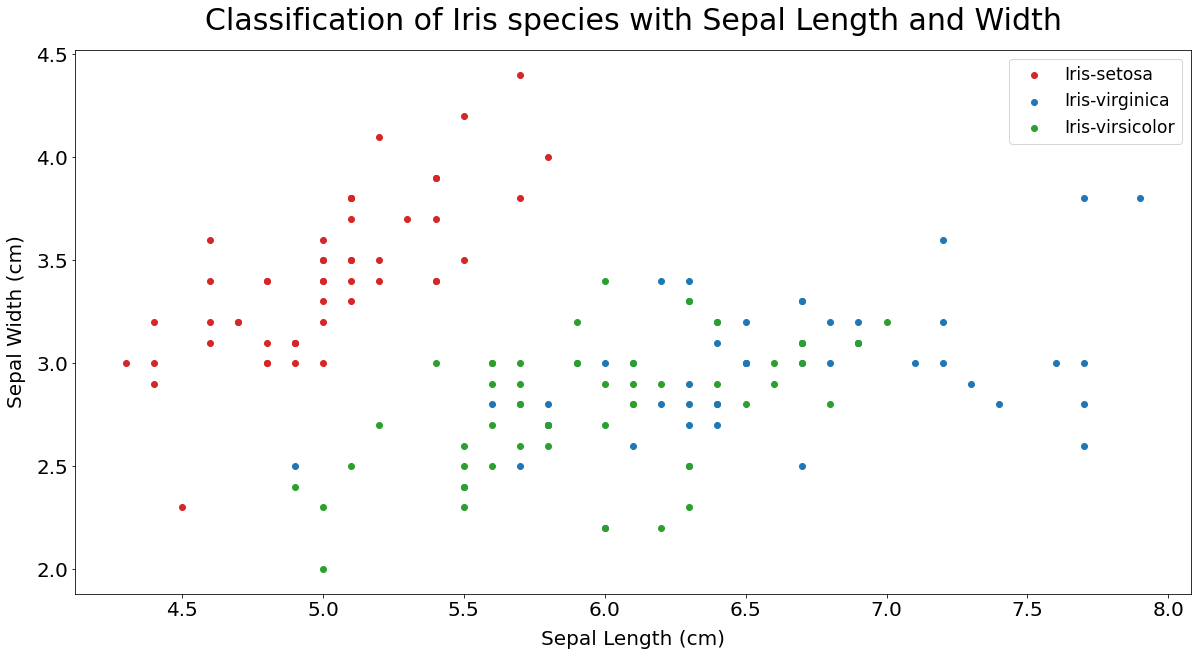

In [11]:
# Set Plot Size 
plt.figure(figsize=(20, 10)) 

## Set Variables 
plt.scatter(df["SepalLengthCm"].loc[df["Species"]=="Iris-setosa"], df["SepalWidthCm"].loc[df["Species"]=="Iris-setosa"], 
            c="tab:red", label="Iris-setosa")
plt.scatter(df["SepalLengthCm"].loc[df["Species"]=="Iris-virginica"], df["SepalWidthCm"].loc[df["Species"]=="Iris-virginica"], 
            c="tab:blue", label="Iris-virginica")
plt.scatter(df["SepalLengthCm"].loc[df["Species"]=="Iris-versicolor"], df["SepalWidthCm"].loc[df["Species"]=="Iris-versicolor"], 
            c="tab:green", label="Iris-virsicolor")

## plot Labelling
plt.title('Classification of Iris species with Sepal Length and Width',fontsize=30, pad=20) ## Title Labelling
plt.xlabel("Sepal Length (cm)", fontsize = 20, labelpad=10) ## X-axis Labelling
plt.ylabel("Sepal Width (cm)", fontsize = 20, labelpad=10) ## Y-axis Labelling

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

## Plot legnd 
plt.legend(fontsize="xx-large")

<br/><hr/>

# Classfication 

### 1. Train / Test 데이터셋 나누기
- 훈련을 마친 데이터를 테스트 해보기위해 전체 데이터를 훈련/테스트 데이터로 나누어준다. 
- 비율은 0.2~0.3정도가 적당하다.

In [13]:
# SckitLearn also provide Test/Train set selection modules kindly!
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.iloc[:len(df), :-1], df.iloc[:len(df), -1],test_size=0.2)
x_train.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
122,7.7,2.8,6.7,2.0
8,4.4,2.9,1.4,0.2
109,7.2,3.6,6.1,2.5
66,5.6,3.0,4.5,1.5
104,6.5,3.0,5.8,2.2


In [14]:
x_train.shape

(120, 4)

In [15]:
y_train

122     Iris-virginica
8          Iris-setosa
109     Iris-virginica
66     Iris-versicolor
104     Iris-virginica
            ...       
110     Iris-virginica
84     Iris-versicolor
11         Iris-setosa
83     Iris-versicolor
33         Iris-setosa
Name: Species, Length: 120, dtype: object

In [16]:
x_test.shape

(30, 4)

In [17]:
y_test

95     Iris-versicolor
32         Iris-setosa
54     Iris-versicolor
14         Iris-setosa
56     Iris-versicolor
13         Iris-setosa
92     Iris-versicolor
97     Iris-versicolor
89     Iris-versicolor
2          Iris-setosa
108     Iris-virginica
0          Iris-setosa
52     Iris-versicolor
50     Iris-versicolor
77     Iris-versicolor
148     Iris-virginica
133     Iris-virginica
147     Iris-virginica
73     Iris-versicolor
126     Iris-virginica
65     Iris-versicolor
40         Iris-setosa
74     Iris-versicolor
42         Iris-setosa
24         Iris-setosa
136     Iris-virginica
60     Iris-versicolor
139     Iris-virginica
68     Iris-versicolor
5          Iris-setosa
Name: Species, dtype: object

In [18]:
Counter(y_train)

Counter({'Iris-virginica': 43, 'Iris-setosa': 41, 'Iris-versicolor': 36})

# KNN을 활용한 분류
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
### KNN 클래스 변수 설명
class sklearn.neighbors.KNeighborsClassifier(
n_neighbors=5, ## 디폴트=5 KNN의 이웃 개수 지정
weights='uniform', ## KNN Variation 거리에 따라 가중치를 줌으로써 KNN에 변환을 주는 방법 (디폴트=uniform)
algorithm='auto', 
leaf_size=30, 
p=2, ## P=1 맨해튼/유클리디안 거리 방법 / P=2 민코스키 거리 방법
metric='minkowski', 
metric_params=None, 
n_jobs=None, 
)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=7)
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [20]:
# 해당 KNN 알고리즘을 통해 테스트시 얻게되는 예측 값
y_pred = KNN_classifier.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa'], dtype=object)

In [21]:
# 해당 KNN 알고리즘을 통해 얻게 될 값의 확률 
y_proba =KNN_classifier.predict_proba(x_test)
y_proba

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.71428571, 0.28571429],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.71428571, 0.28571429],
       [0.        , 0.85714286, 0.14285714],
       [0.        , 0.42857143, 0.57142857],
       [0.        , 0.        , 1.        ],
       [0.        , 0.42857143, 0.57142857],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.42857143, 0.57142857],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.

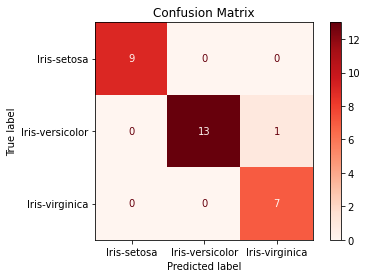

In [24]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
plot = plot_confusion_matrix(KNN_classifier, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답      
                             cmap=plt.cm.Reds, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')
plt.show()

In [29]:
# KNN 알고리즘의 Accuracy 값
KNN_classifier.score(x_test, y_test)

0.9333333333333333